<a href="https://colab.research.google.com/github/Vatsalp599/Vatsalp599-DataScience-GenAI-submissions/blob/main/Mock_test_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I asked AI " want you to code and then when i run it i should get option of uploading the file and create dataframe"

In [ ]:
import pandas as pd
from google.colab import files
import io

print("Please upload your file:")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

  # Determine file type and read into DataFrame
  if fn.endswith('.csv'):
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
  elif fn.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(io.BytesIO(uploaded[fn]))
  else:
    print("Unsupported file format. Please upload a .csv or .xlsx file.")
    df = None

  if df is not None:
    print("DataFrame created successfully! Here are the first 5 rows:")
    print(df.head())
  else:
    print("Failed to create DataFrame.")

Please upload your file:


Saving loan_data.csv to loan_data.csv
User uploaded file "loan_data.csv" with length 3454959 bytes
DataFrame created successfully! Here are the first 5 rows:
   age  years_employed  annual_income  credit_score  credit_history_years  \
0   40            17.2          25579           692                   5.3   
1   33             7.3          43087           627                   3.5   
2   42             1.1          20840           689                   8.4   
3   53             0.5          29147           692                   9.8   
4   32            12.5          63657           630                   7.2   

   savings_assets  current_debt  defaults_on_file  delinquencies_last_2yrs  \
0             895         10820                 0                        0   
1             169         16550                 0                        1   
2              17          7852                 0                        0   
3            1480         11603                 0                  

it gave first 5 rows, which is enough for ensuring that data is correctly classified, it gave out all columns

to check for empty cells in the data i asked AI " please check for empty cells in data and then give out the dataframe head"

In [ ]:
print("Checking for empty cells:")
print(df.isnull().sum())

print("\nDataFrame head after checking for empty cells:")
display(df.head())

Checking for empty cells:
age                        0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

DataFrame head after checking for empty cells:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


As we can see in the output, there are no empty cells so we can move ahead

Now i informed AI to " keep in your memory for further reference that Loan status is Y value and rest are X value, and for me to check, state out Y Value and X values"

In [ ]:
Y_value = 'loan_status'
X_values = [col for col in df.columns if col != Y_value]

print(f"Y Value (Target Variable): {Y_value}")
print(f"X Values (Feature Variables): {X_values}")

Y Value (Target Variable): loan_status
X Values (Feature Variables): ['age', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'savings_assets', 'current_debt', 'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio', 'payment_to_income_ratio']


As we can see in the output that it has been coded that Y value = loan status and rest all column values are considered X values

Now as i want to perform modelling with machine learning, i asked AI to "first scale the data with Min-Max scaler to ensure equal  weightage of all X values "

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale the X_values
df_scaled = df.copy() # Create a copy to store scaled data
df_scaled[X_values] = scaler.fit_transform(df[X_values])

print("Data scaled successfully! Here are the first 5 rows of the scaled X values:")
display(df_scaled[X_values].head())

Data scaled successfully! Here are the first 5 rows of the scaled X values:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627


as we can visually see that all values of X have been scaled are in between of 0 and 1 which is what we wanted

Now before performing modelling, we have to divide the dataset in train and test split so i asked AI " please divide the data in train and test split with 75% being train and 25% being test split and also startify Y"

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled[X_values]
y = df[Y_value]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data split into training and testing sets successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully!
X_train shape: (37500, 15)
X_test shape: (12500, 15)
y_train shape: (37500,)
y_test shape: (12500,)


As from the output, it can be observed that data has been slit into X train, X test, Y train, Y test with train split having 37500 samples and test split having 12500 samples which is exactly 75% and 25% of total sample size which is 50000

Now i asked AI to perform logistic regression to predict whether loan will be approved or rejected and then get us scores of the model for analysis purpose, " here generate the logistic regression to predict if the loan is accepted or rejected and also give the scores of the model for analysis purpose"

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and binary classification

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate and print the evaluation scores
print("Logistic Regression Model Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Logistic Regression Model Scores:
Accuracy: 0.8377
Precision: 0.8441
Recall: 0.8648
F1-Score: 0.8544
ROC-AUC Score: 0.9203


The accurary of the model is 0.8377 which means the model is roughly 84% with its predictions, the precision is 0.8441 which indicates that when model predicted loan approved, it is correct roughly 84% of times and recall is 0.8648 which means the model successfully identifies roughly 86% of applicants who genuinely deserve loan approval.

The main objective is to not approve loan for someone who deosnt deserve to be granted one, so our main aim is to reduce false positives

Now to better understand the model, i asked AI " please create confusion matrix for the model"

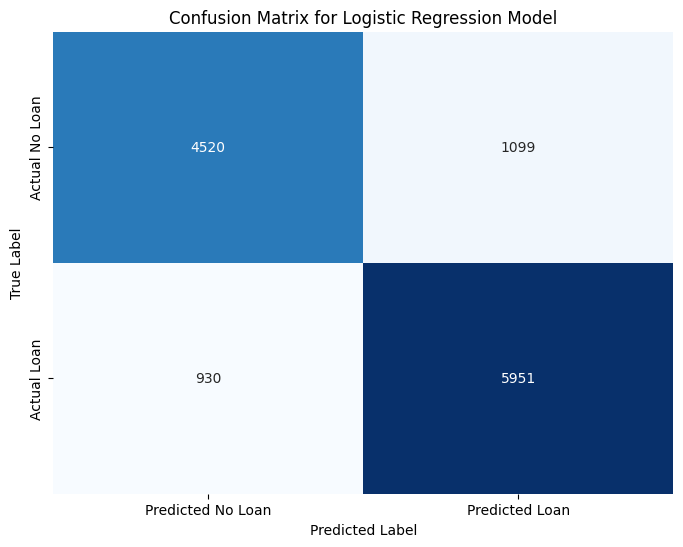

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Loan', 'Predicted Loan'],
            yticklabels=['Actual No Loan', 'Actual Loan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

As from the confusion matrix we can see that the true positives is 5951 which means that These are applicants who deserve a loan, and the model correctly approved them, True Negative is 4520 which means these applicant dont deserve loan and model correctly rejects them, false negative is 930 which indicates model rejected 930 applicants who deserved loan and the main focus which is false positive is 1099 wherein model approves loan for 1099 apllicants, who actually dont deserve it.

Now lets try different ML model which is decision tree and interpret if its score gives better precision score which indirectly means lesser false positives

i asked AI " i want you to generate decision tree now to predict whether loan gets approved or rejected and give scores then for analysis purpose"

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate and print the evaluation scores
print("Decision Tree Classifier Model Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

Decision Tree Classifier Model Scores:
Accuracy: 0.8322
Precision: 0.8483
Recall: 0.8465
F1-Score: 0.8474
ROC-AUC Score: 0.8305


As we can see the scores, accuracy is 0.8322, which means the model on average is roughly accurate 83.22% of times when it predicts a particular class, precision is 0.8483, which means whenever this model predicts loan is approved it is correct roughly 84.83% of times and recall is 0.8465 which means the model 84.65% times correctly identifies most eligible borrowers.

now i asked AI " please create confusion matrix for the decision tree model"

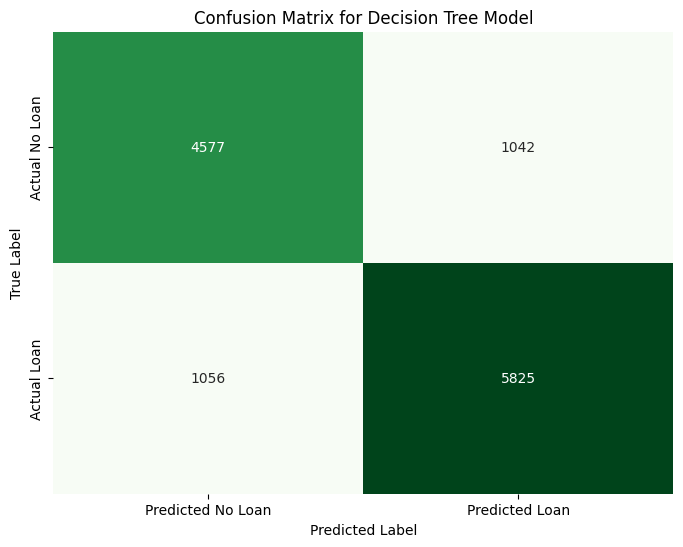

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted No Loan', 'Predicted Loan'],
            yticklabels=['Actual No Loan', 'Actual Loan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

As from the confusion matrix we can see that True positive is 5825 which means these are applicants who deserve a loan, and the model correctly approved them, true negative is 4577 which means these applicant dont deserve loan and model correctly rejects them, False negative is 1056 which means these candidates deserved loan but the model rejected their loan and finally false positive is 1042 which means the model approved loans for 1042 applicants who actualy did not deserve the loan

**CONCLUSION :**
after evaluating both models along with their accuracy, precision and recall, the model that performs better with our objective which is to not approve loan of applicant who doesnt deserve, so we need to minize false positvies and increase precision score

The false positives of decision tree which are 1042 are lesser than false positives of logistic regression model which were 1099

the precision of decision tree 0.8483 is also better than precision of logistioc regression 0.8441, meaning decision tree loan approvals are but more reliable and less risky.

although decision tree have more false negatives, these do not pose financial risk whereas false postives does

So decision tree is better model in the case of loan approvals and in specific for this dataset

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Gradient Boosting Classifier model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)
y_pred_proba_gb = gradient_boosting_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate and print the evaluation scores
print("Gradient Boosting Classifier Model Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

Gradient Boosting Classifier Model Scores:
Accuracy: 0.8872
Precision: 0.8836
Recall: 0.9157
F1-Score: 0.8994
ROC-AUC Score: 0.9608


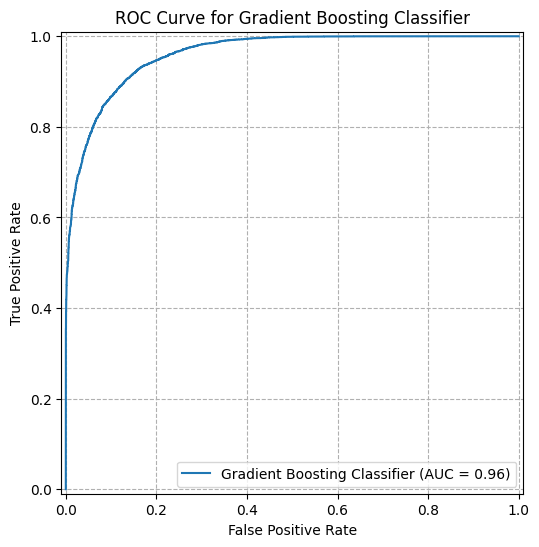

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve for the Gradient Boosting model
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(gradient_boosting_model, X_test, y_test, ax=plt.gca(), name='Gradient Boosting Classifier')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle='--')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate and print the evaluation scores
print("Random Forest Classifier Model Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Random Forest Classifier Model Scores:
Accuracy: 0.8842
Precision: 0.8896
Recall: 0.9015
F1-Score: 0.8955
ROC-AUC Score: 0.9555
